# Hoja de trabajo no. 3
Andrea Monzon carné 23006810

In [73]:
import re

### Problema #1

#### 1

In [74]:
re_p1 = r'^([A-Za-z0-9._\-])+@([A-Za-z0-9._\-])+\.([A-Za-z0-9._\-])+$'

In [75]:

match = re.search(re_p1, '23006810@galileo.edu')

if match:
  print('found', match.group())
else:
  print('no match')

found 23006810@galileo.edu


#### 2

In [76]:
re_p2 = '^(http)s?:\/\/www\.([a-z]){1}([_-]?[a-z0-9])+\.((com)|(org)|(edu))$'

In [77]:
match = re.search(re_p2, 'https://www.guate360-porelmundo.com')

if match:
  print('found', match.group())
else:
  print('no match')

found https://www.guate360-porelmundo.com


In [78]:
match = re.search(re_p2, 'https://www.8.org')

if match:
  print('found', match.group())
else:
  print('no match')

no match


3

In [79]:
re_p3 = '^([A-F0-9]{2} ){5}[A-F0-9]{2}$'

In [80]:
match = re.search(re_p3, '5A 6F AF 8C 9B 1D')

if match:
  print('found', match.group())
else:
  print('no match')

found 5A 6F AF 8C 9B 1D


In [81]:
match = re.search(re_p3, '3A 7C FA C8 6D 4J')

if match:
  print('found', match.group())
else:
  print('no match')

no match


4

In [82]:
re_p4 = '^((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$'

In [83]:
match = re.search(re_p4, '192.16.8.1')

if match:
  print('found', match.group())
else:
  print('no match')

found 192.16.8.1


In [84]:
match = re.search(re_p4, '192.168.45.345')

if match:
  print('found', match.group())
else:
  print('no match')

no match


5

In [85]:
re_p5 = '^((3[0-1])|[1-2][0-9]|[0]?[1-9])[-/]{1}([0]?[1-9]|1[0-2])[-/]{1}(20)?[0-1][0-9]$'

In [86]:
match = re.search(re_p5, '20/1/2019')

if match:
  print('found', match.group())
else:
  print('no match')

found 20/1/2019


In [87]:
match = re.search(re_p5, '12/12/22')

if match:
  print('found', match.group())
else:
  print('no match')

no match


### Problema 2

In [172]:
import pandas as pd
import glob
import os
import spacy
import spacy.cli

In [89]:
ruta = '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/'

In [90]:
all_files = glob.glob(os.path.join(ruta, "*.txt"))

In [91]:
all_files

['/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D7.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D6.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D3.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D5.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D4.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D9.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D8.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D2.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D20.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D19.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/Datos/D16.txt',
 '/content/drive/MyDrive/Maestria Data Science/2023

In [92]:
df = pd.concat((pd.read_csv(f, header=None, names=['Fecha']) for f in all_files), ignore_index=True)

In [93]:
df

,Fecha
0,05/02/2018
1,22/01/2016
2,05/03/2015
3,02/10/2018
4,08/07/2017
...,...
20995,08.06.2019
20996,15.02.2016
20997,06.02.2017
20998,01.02.2017


In [94]:
date_regex = r'(3[0-1]|[1-2][0-9]|[0]?[1-9])[-/\.]([0]?[1-9]|1[0-2]|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[-/\.]([0-9]{4})'

In [100]:
df[['day', 'month', 'year']] = df['Fecha'].str.extract(date_regex)

In [101]:
month_to_number = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

In [102]:
df['month'] = df['month'].replace(month_to_number)

In [103]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [104]:
df

,Fecha,day,month,year
0,05/02/2018,5,2,2018
1,22/01/2016,22,1,2016
2,05/03/2015,5,3,2015
3,02/10/2018,2,10,2018
4,08/07/2017,8,7,2017
...,...,...,...,...
20995,08.06.2019,8,6,2019
20996,15.02.2016,15,2,2016
20997,06.02.2017,6,2,2017
20998,01.02.2017,1,2,2017


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   21000 non-null  object
 1   day     21000 non-null  int64 
 2   month   21000 non-null  int64 
 3   year    21000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 656.4+ KB


In [106]:
mean_day = df['day'].mean()
mean_month = df['month'].mean()
mean_year = df['year'].mean()

In [111]:
print(f'Dia promedio: { "{:.2f}".format(mean_day)}')
print(f'Mes promedio: { "{:.2f}".format(mean_month)}')
print(f'Año promedio: { "{:.2f}".format(mean_year)}')

Dia promedio: 15.62
Mes promedio: 6.47
Año promedio: 2016.69


### Problema 3

In [117]:
ruta_tweets = '/content/drive/MyDrive/Maestria Data Science/2023-03/TextMining/HT03/tw_source.csv'
df_tweets = pd.read_csv(ruta_tweets, header=None, encoding='latin-1')

In [118]:
df_tweets.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [145]:
cols = ['numlikes','id','timestamp','noquery', 'user', 'content']
df_tweets.columns = cols

In [153]:
df_tweets.head(5)

,numlikes,id,timestamp,noquery,user,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [146]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   numlikes   1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   timestamp  1600000 non-null  object
 3   noquery    1600000 non-null  object
 4   user       1600000 non-null  object
 5   content    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [159]:
username_regex = r'(@[\w-]+)'

In [161]:
df_tweets['quoted_user'] = df_tweets['content'].str.extract(username_regex)

In [165]:
most_quoted = df_tweets['quoted_user'].value_counts().nlargest(3)
most_quoted

@mileycyrus    4308
@tommcfly      3767
@ddlovato      3255
Name: quoted_user, dtype: int64

In [166]:
df_mq = df_tweets.copy()

In [167]:
mq_regex = r'(@mileycyrus|@tommcfly|@ddlovato)'

In [168]:
df_mq['mq'] = df_mq['content'].str.extract(mq_regex)

In [170]:
df_mq.dropna(inplace=True)

In [171]:
df_mq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11777 entries, 460 to 1599256
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   numlikes     11777 non-null  int64 
 1   id           11777 non-null  int64 
 2   timestamp    11777 non-null  object
 3   noquery      11777 non-null  object
 4   user         11777 non-null  object
 5   content      11777 non-null  object
 6   quoted_user  11777 non-null  object
 7   mq           11777 non-null  object
dtypes: int64(2), object(6)
memory usage: 828.1+ KB


In [175]:
!python -m spacy download en_core_web_sm

2023-09-10 02:14:40.428577: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [176]:
nlp = spacy.load("en_core_web_sm")

In [177]:
def Normalizacion(corpus):
  """
  Esta funcion normaliza el texto, eliminando caracteres particulares y pasamos a minusculas
  """
  newCorpus = []
  for doc in corpus:
    newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
  return newCorpus

In [181]:
df_mq['content'] = Normalizacion(df_mq['content'])

In [188]:
def Tokenizacion(corpus):
  """
  Esta funcion aplica la tokenizacion de elementos para cada correo usando el modelo de lenguaje en_core_news_sm
  """
  newCorpus = []
  for doc in corpus:
    newCorpus.append(nlp(doc))
  return newCorpus

In [184]:
df_mq['content'] = Tokenizacion(df_mq['content'])

In [185]:
def removeStops(corpus):
  """
  Esta funcion remueve los stopwords de cada documento usando el modelo de lenguaje en ingles
  """
  newCorpus = []
  for doc in corpus:
    s = ""
    for token in doc:
      if(token.is_stop == False):
        s = s + token.text + ' '
    newCorpus.append(s.strip())
  return newCorpus

In [186]:
df_mq['content'] = removeStops(df_mq['content'])

In [187]:
df_mq['content'].head(5)

460                   ddlovato davidhenrie ummmmm nt find
573                                      ddlovato hate nt
1021    mileycyrus hahaha nt like time ny got 30 mins ...
1690    tommcfly hey saw u guys play   pushoverdidnt 2...
1789    tommcfly good morning tom nt send message shor...
Name: content, dtype: object

In [180]:
def stemmingLemmating(corpus):
  documentos = Tokenizacion(corpus)
  newCorpus = []
  for doc in documentos:
    s = ''
    for token in doc:
      s = s + token.lemma_ + ' '
    newCorpus.append(s.strip())
  return newCorpus

In [189]:
df_mq['content'] = stemmingLemmating(df_mq['content'])

In [190]:
df_mq['content'].head(5)

460                  ddlovato davidhenrie ummmmm not find
573                                     ddlovato hate not
1021    mileycyrus hahaha not like time ny get 30 min ...
1690    tommcfly hey see u guy play    pushoverdidnt 2...
1789    tommcfly good morning tom not send message sho...
Name: content, dtype: object

In [191]:
def listToString(termList):
  strX = ""
  for palabra in termList:
    strX = strX + palabra + ' '
  return strX

In [198]:
def generateEmptyTF(cols, rows):
  outDF = pd.DataFrame(index=rows, columns=cols)
  outDF = outDF.fillna(0)
  return outDF

In [201]:
def generateEmptyTF(cols, rows):
  outDF = pd.DataFrame(index=rows, columns=cols)
  outDF = outDF.fillna(0)
  return outDF

In [203]:
def calculoTF(corpus, df):
  corpus = Tokenizacion(corpus)
  for index, doc in enumerate(corpus):
    for token in doc:
      try:
        colIndex = list(df.columns).index(token.text)
        df.iloc[index, colIndex] = df.iloc[index, colIndex] + 1
      except:
        pass
  return df

In [219]:
def calculateTop10words(df, user):
  df_user = df['content'].loc[df['mq'] == user].copy()
  strCorpus = listToString(df_user)

  strCorpus = strCorpus.strip().split(' ')
  setCorpus = set(strCorpus) #de una lista, eliminar las palabras repetidas

  #remover usuario
  setCorpus.remove(user.replace('@', ''))

  corpusCols = list(setCorpus)
  corpusRows = range(0, len(df_user))

  tfCorpus = generateEmptyTF(corpusCols, corpusRows)

  tfMatrix = calculoTF(df_user, tfCorpus)

  s = tfMatrix.sum().sort_values(ascending=False, inplace=False)

  return s.head(10)

In [222]:
miley_top10 = calculateTop10words(df_mq, '@mileycyrus')

In [223]:
tommcfly_top10 = calculateTop10words(df_mq, '@tommcfly')

In [224]:
ddlovato_top10 = calculateTop10words(df_mq, '@ddlovato')

In [225]:
miley_top10

love     903
miley    838
not      676
u        645
m        587
good     506
vote     417
come     322
s        288
hope     285
dtype: int64

In [226]:
tommcfly_top10

tom     688
not     669
love    464
m       460
come    373
good    352
u       343
xx      304
guy     287
x       271
dtype: int64

In [227]:
ddlovato_top10

love    620
not     614
demi    578
m       523
u       437
come    365
s       271
wish    253
good    252
hope    244
dtype: int64

In [232]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [231]:
wordcloud_miley = WordCloud().generate_from_frequencies(miley_top10)

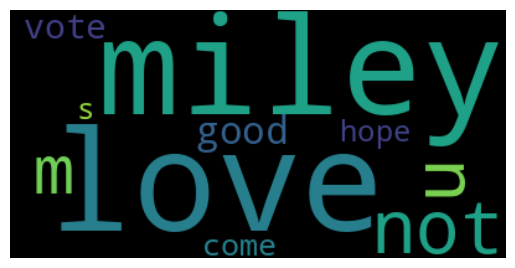

In [233]:
plt.imshow(wordcloud_miley, interpolation='bilinear')
plt.axis('off')
plt.show()

In [234]:
wordcloud_tommcfly = WordCloud().generate_from_frequencies(tommcfly_top10)

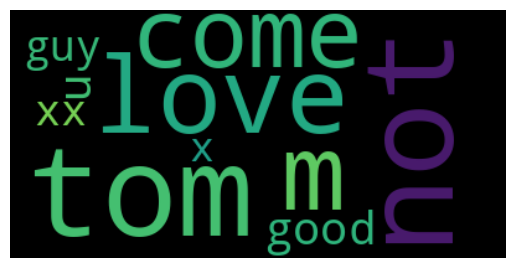

In [235]:
plt.imshow(wordcloud_tommcfly, interpolation='bilinear')
plt.axis('off')
plt.show()

In [236]:
wordcloud_ddlovato = WordCloud().generate_from_frequencies(ddlovato_top10)

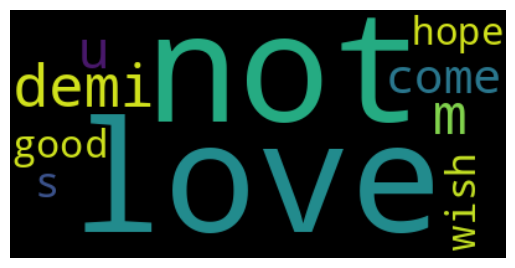

In [237]:
plt.imshow(wordcloud_ddlovato, interpolation='bilinear')
plt.axis('off')
plt.show()